In [10]:
import re
import nltk
import gensim
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from sklearn.decomposition import PCA

In [11]:
# Загрузка стоп-слов
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladimir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Создание собственного корпуса 

In [12]:
russian_corpus = [
    "Природа играет важную роль в жизни человека. Леса очищают воздух и дают тень.",
    "Технологии стремительно развиваются и меняют мир вокруг нас.",
    "Современные компьютеры способны выполнять миллионы операций в секунду.",
    "Интернет соединяет людей из разных стран и культур.",
    "Образование помогает людям открывать новые возможности и строить карьеру.",
    "Спорт укрепляет здоровье и учит командной работе.",
    "Наука и искусство — важные составляющие человеческой цивилизации.",
    "Экономика зависит от природных ресурсов и инноваций.",
    "Машинное обучение и искусственный интеллект становятся частью повседневной жизни.",
    "Чтение книг развивает мышление и расширяет кругозор."
]

# 2. Предобработка текстов

In [13]:
# Используем стандартный список русских стоп-слов из NLTK
russian_stopwords = set(stopwords.words("russian")) 

# Функция очистки и токенизации текста
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', ' ', text)     # оставляем только кириллицу и пробелы
    tokens = text.split()
    tokens = [t for t in tokens if t not in russian_stopwords and len(t) > 2]
    return tokens

# Токенизируем весь корпус
tokenized_corpus = [preprocess_text(sentence) for sentence in russian_corpus]

print("Пример токенизированного предложения:\n", tokenized_corpus[0])

Пример токенизированного предложения:
 ['природа', 'играет', 'важную', 'роль', 'жизни', 'человека', 'леса', 'очищают', 'воздух', 'дают', 'тень']


# 3. Обучение модели Word2Vec

In [14]:
# Обучение модели Word2Vec
model = Word2Vec( 
    sentences=tokenized_corpus, # список токенизированных предложений
    vector_size=100, # размерность векторов слов
    window=3, # контекстное окно
    min_count=1, # минимальная частота слова для включения в словарь
    sg=1, # используем skip-gram (sg=1), иначе CBOW (sg=0)
    epochs=300 # количество эпох обучения
)

# Сохраним модель (по желанию)
model.save("word2vec_rus.model")

# 4. Анализ результатов

In [15]:
# Посмотрим, какие слова есть в словаре
print("\nСлова в словаре модели:")
print(list(model.wv.index_to_key))

# Пример похожих слов
print("\nПохожие слова к 'наука':")
print(model.wv.most_similar("наука", topn=5))

print("\nПохожие слова к 'человек':")
try:
    print(model.wv.most_similar("человек", topn=5))
except KeyError:
    print("Слово 'человек' не найдено в словаре (маленький корпус).")


Слова в словаре модели:
['жизни', 'кругозор', 'соединяет', 'способны', 'выполнять', 'миллионы', 'операций', 'секунду', 'интернет', 'людей', 'современные', 'разных', 'стран', 'культур', 'образование', 'помогает', 'компьютеры', 'вокруг', 'расширяет', 'мир', 'меняют', 'развиваются', 'стремительно', 'технологии', 'тень', 'дают', 'воздух', 'очищают', 'леса', 'человека', 'роль', 'важную', 'играет', 'людям', 'открывать', 'новые', 'зависит', 'мышление', 'развивает', 'книг', 'чтение', 'повседневной', 'частью', 'становятся', 'интеллект', 'искусственный', 'обучение', 'машинное', 'инноваций', 'ресурсов', 'природных', 'экономика', 'возможности', 'цивилизации', 'человеческой', 'составляющие', 'важные', 'искусство', 'наука', 'работе', 'командной', 'учит', 'здоровье', 'укрепляет', 'спорт', 'карьеру', 'строить', 'природа']

Похожие слова к 'наука':
[('очищают', 0.9222136735916138), ('роль', 0.9129074215888977), ('человека', 0.9116790294647217), ('жизни', 0.9103946685791016), ('обучение', 0.90891832113

# 5. Визуализация вектора слов

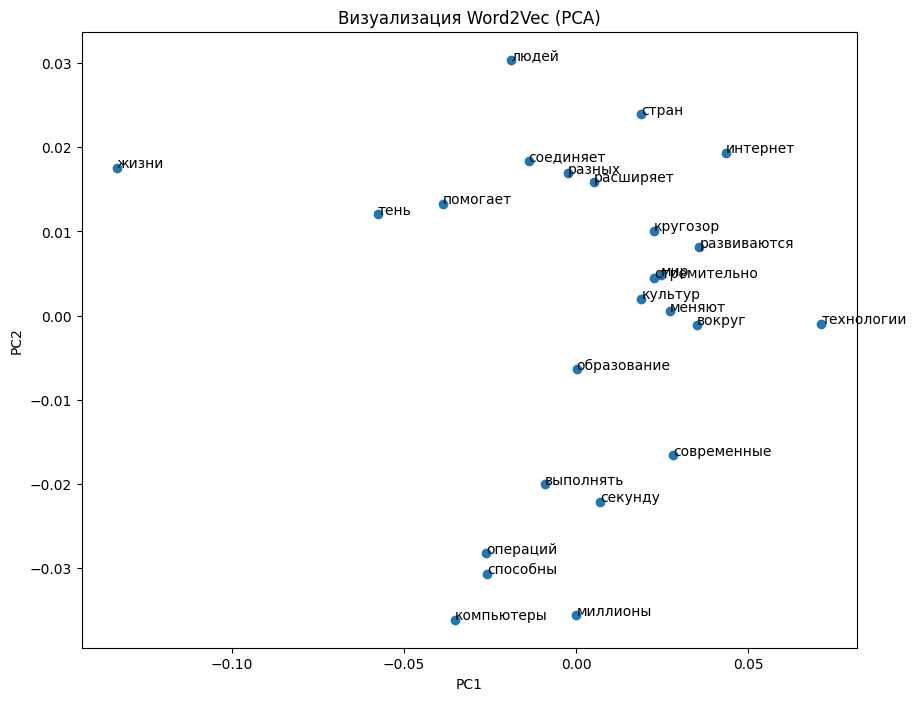

In [16]:
def plot_words(model, num_words=20):
    words = list(model.wv.index_to_key)[:num_words]
    X = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    plt.figure(figsize=(10,8))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.title("Визуализация Word2Vec (PCA)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

plot_words(model, num_words=25)

# 6. Пример вычислений на векторах 

In [17]:
try:
    analogy = model.wv.most_similar(positive=["интернет", "технологии"], negative=["люди"], topn=5)
    print("\nАналогия (интернет + технологии - люди):")
    for w, sim in analogy:
        print(f"{w:15} — {sim:.3f}")
except Exception as e:
    print("Не удалось вычислить аналогию:", e)

Не удалось вычислить аналогию: "Key 'люди' not present in vocabulary"
